Pandas 문법 정리

일반적으로 각 패키지는 pd, np, plt의 이름으로 불러옴

print를 사용 안해도 마지막 줄에 있는 것이 출력됨.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Object Creation

Pandas는 값을 가지고 있는 리스트를 통해 Series를 만듦

* Series : 모든 유형의 데이터를 보유하는 1차원 배열, 테이블의 열
* DataFrame : 2차원 배열 또는 행과 열이 있는 테이블과 같은 2차원 데이터 구조이다. 

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 7])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    7.0
dtype: float64

datatime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터 프레임 만들기

* NaN : 비어있는 값, 단순한 등호로 비교가 불가하기 때문에 isnan()으로 비교를 해야한다.
* numpy : 배열을 사용하기 위한 파이썬의 표준 패키지 (파이썬은 자체적으로 배열 제공 x)
* randn(m,n) : random 내장 함수, 기대값이 0, 표준 편차가 1인 가우시안 표준 정규 분포를 따르는 난수를 생성한 m*n 행렬 return

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.032339,0.781471,0.701498,0.808001
2013-01-02,1.391540,-0.846449,0.925578,0.044001
2013-01-03,-1.053788,0.947180,0.959520,0.678889
2013-01-04,-1.454057,0.669959,1.184233,-0.503670
2013-01-05,-0.365290,-0.336458,0.700912,0.446074
2013-01-06,0.562538,-0.703044,1.385391,-0.049426


Series와 같은 것으로 변환될 수 있는 객체들의 dictonary로 구성된 데이터 프레임 만들기

* dictonary : 자료형 중 하나로 키와 값으로 이루어짐

In [5]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


데이터프레임 결과물의 열의 데이터 타입 확인(.dtypes)

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

2. Viewing Data (데이터 확인하기)

head(), tail()은 데이터의 전부가 아닌 상단, 하단 부분만 보여준다.

() 안의 숫자 입력 가능 / 위, 아래부터 숫자만큼 불러와줌. / 기본값은 5여서 숫자를 입력하지 않는다면 자동으로 5줄 출력

(ex)

In [7]:
df.tail(3) #끝에서 마지막 3줄을 불러옴

,A,B,C,D
2013-01-04,-1.454057,0.669959,1.184233,-0.503670
2013-01-05,-0.365290,-0.336458,0.700912,0.446074
2013-01-06,0.562538,-0.703044,1.385391,-0.049426


In [8]:
df.head() 

,A,B,C,D
2013-01-01,0.032339,0.781471,0.701498,0.808001
2013-01-02,1.391540,-0.846449,0.925578,0.044001
2013-01-03,-1.053788,0.947180,0.959520,0.678889
2013-01-04,-1.454057,0.669959,1.184233,-0.503670
2013-01-05,-0.365290,-0.336458,0.700912,0.446074


index, column, numpy 데이터에 대한 세부 정보 확인하기

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values #numpy 데이터

array([[ 0.03233882,  0.78147068,  0.7014985 ,  0.80800057],
       [ 1.39153981, -0.84644903,  0.92557758,  0.04400097],
       [-1.05378842,  0.94717982,  0.95952024,  0.67888903],
       [-1.4540569 ,  0.66995907,  1.18423308, -0.5036698 ],
       [-0.3652902 , -0.33645835,  0.7009119 ,  0.44607436],
       [ 0.56253837, -0.70304372,  1.38539112, -0.04942641]])

데이터의 대략적인 통계적 정보 요악 확인하기

* mean : 평균

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.147786,0.085443,0.976189,0.237311
std,1.046998,0.804592,0.270111,0.496568
min,-1.454057,-0.846449,0.700912,-0.503670
25%,-0.881664,-0.611397,0.757518,-0.026070
50%,-0.166476,0.166750,0.942549,0.245038
75%,0.429988,0.753593,1.128055,0.620685
max,1.391540,0.947180,1.385391,0.808001


데이터 전치하기

In [13]:
df.T #위의 df.head()랑 비교

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.032339,1.391540,-1.053788,-1.454057,-0.365290,0.562538
B,0.781471,-0.846449,0.947180,0.669959,-0.336458,-0.703044
C,0.701498,0.925578,0.959520,1.184233,0.700912,1.385391
D,0.808001,0.044001,0.678889,-0.503670,0.446074,-0.049426


축 별로 정렬

* 축(axis)는 n차원 배열을 구성하는 요소 / 2차원 배열에서 axis = 0 은 행을 의미, axis = 1은 열을 의미
* ascending : 오름차순, 내림차순 결정 / (ex) ascending = true 는 오름차순, = false 는 내림차순

In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.808001,0.701498,0.781471,0.032339
2013-01-02,0.044001,0.925578,-0.846449,1.391540
2013-01-03,0.678889,0.959520,0.947180,-1.053788
2013-01-04,-0.503670,1.184233,0.669959,-1.454057
2013-01-05,0.446074,0.700912,-0.336458,-0.365290
2013-01-06,-0.049426,1.385391,-0.703044,0.562538


값 별로 정렬

In [15]:
df.sort_values(by='B', ascending=False) #B를 기준으로 정렬

,A,B,C,D
2013-01-03,-1.053788,0.947180,0.959520,0.678889
2013-01-01,0.032339,0.781471,0.701498,0.808001
2013-01-04,-1.454057,0.669959,1.184233,-0.503670
2013-01-05,-0.365290,-0.336458,0.700912,0.446074
2013-01-06,0.562538,-0.703044,1.385391,-0.049426
2013-01-02,1.391540,-0.846449,0.925578,0.044001


3. Selection

Pandas에 최적화된 데이터 접근 방법인 .at, .iat, .loc 및 .iloc을 중점으로 배울 것

Getting (데이터 얻기)

df.A와 동일한 Series를 생성하는 단일 열을 선택

In [16]:
df['A']

2013-01-01    0.032339
2013-01-02    1.391540
2013-01-03   -1.053788
2013-01-04   -1.454057
2013-01-05   -0.365290
2013-01-06    0.562538
Freq: D, Name: A, dtype: float64

슬라이싱 -> ':' 이용 

In [17]:
df[0:3]

,A,B,C,D
2013-01-01,0.032339,0.781471,0.701498,0.808001
2013-01-02,1.391540,-0.846449,0.925578,0.044001
2013-01-03,-1.053788,0.947180,0.959520,0.678889


In [18]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,1.391540,-0.846449,0.925578,0.044001
2013-01-03,-1.053788,0.947180,0.959520,0.678889
2013-01-04,-1.454057,0.669959,1.184233,-0.503670


Selection by Label(Label을 통한 선택)

.loc[] 이용, 라벨을 사용하여 횡단면을 얻음

* label : index 이름

In [19]:
df.loc[dates[0]]

A    0.032339
B    0.781471
C    0.701498
D    0.808001
Name: 2013-01-01 00:00:00, dtype: float64

라벨을 사용하여 여러 축의 데이터를 얻음

In [20]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.032339,0.781471
2013-01-02,1.391540,-0.846449
2013-01-03,-1.053788,0.947180
2013-01-04,-1.454057,0.669959
2013-01-05,-0.365290,-0.336458
2013-01-06,0.562538,-0.703044


양쪽 종단점을 포함한 라벨 슬라이싱

In [21]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,1.391540,-0.846449
2013-01-03,-1.053788,0.947180
2013-01-04,-1.454057,0.669959


반한되는 객체 차원 줄이기

In [22]:
df.loc['20130102',['A','B']] #1차원


A    1.391540
B   -0.846449
Name: 2013-01-02 00:00:00, dtype: float64

스칼라 값을 얻음

* 스칼라 : 방향은 없지만, 실수 공간에서 크기를 나타내는 값, 상수

In [23]:
df.loc[dates[0],'A']

0.032338824495618486

스칼라 값을 더 빠르게 구하는 방법(.at 이용)

In [24]:
df.at[dates[0],'A']

0.032338824495618486

Selection by Position

넘겨받은 정수의 위치를 기준으로 선택

In [25]:
df.iloc[3]

A   -1.454057
B    0.669959
C    1.184233
D   -0.503670
Name: 2013-01-04 00:00:00, dtype: float64

정수로 표기된 슬라이스들을 통해,  numpy/python과 유사하게 작동

In [26]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-1.454057,0.669959
2013-01-05,-0.365290,-0.336458


정수로 표기된 위치값의 리스트들을 통해, numpy / python의 스타일과 유사해집니다.

In [27]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,1.391540,0.925578
2013-01-03,-1.053788,0.959520
2013-01-05,-0.365290,0.700912


명시적으로 행, 열을 나누고자 하는 경우

In [28]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,1.391540,-0.846449,0.925578,0.044001
2013-01-03,-1.053788,0.947180,0.959520,0.678889


In [29]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.781471,0.701498
2013-01-02,-0.846449,0.925578
2013-01-03,0.947180,0.959520
2013-01-04,0.669959,1.184233
2013-01-05,-0.336458,0.700912
2013-01-06,-0.703044,1.385391


명시적으로 특정한 값을 얻고자 하는 경우

In [30]:
df.iloc[1,1]

-0.8464490258212535

스칼라 값을 빠르게 얻는 방법

In [31]:
df.iat[1,1]

-0.8464490258212535

Boolean Indexing

데이터를 선택하기 위해 단일 열의 값을 사용

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.032339,0.781471,0.701498,0.808001
2013-01-02,1.391540,-0.846449,0.925578,0.044001
2013-01-06,0.562538,-0.703044,1.385391,-0.049426


Boolean 조건을 충족하는 데이터프레임에서 값을 선택, 만족을 하지 않는 것은 NaN으로 표시

In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,0.032339,0.781471,0.701498,0.808001
2013-01-02,1.391540,NaN,0.925578,0.044001
2013-01-03,NaN,0.947180,0.959520,0.678889
2013-01-04,NaN,0.669959,1.184233,NaN
2013-01-05,NaN,NaN,0.700912,0.446074
2013-01-06,0.562538,NaN,1.385391,NaN


isin() : 필터링 해주는 함수

In [34]:
df2 = df.copy() #클론 만듦
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three'] #E부분 만듦
df2

,A,B,C,D,E
2013-01-01,0.032339,0.781471,0.701498,0.808001,one
2013-01-02,1.391540,-0.846449,0.925578,0.044001,one
2013-01-03,-1.053788,0.947180,0.959520,0.678889,two
2013-01-04,-1.454057,0.669959,1.184233,-0.503670,three
2013-01-05,-0.365290,-0.336458,0.700912,0.446074,four
2013-01-06,0.562538,-0.703044,1.385391,-0.049426,three


In [35]:
df2[df2['E'].isin(['two','four'])] #E에서 two, four 부분만 출력

,A,B,C,D,E
2013-01-03,-1.053788,0.947180,0.959520,0.678889,two
2013-01-05,-0.365290,-0.336458,0.700912,0.446074,four


Setting(설정)

새 열을 설정하면 데이터가 인덱스 별로 자동 정렬됌.

In [36]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1
df["F"] = s1
df

,A,B,C,D,F
2013-01-01,0.032339,0.781471,0.701498,0.808001,NaN
2013-01-02,1.391540,-0.846449,0.925578,0.044001,1.0
2013-01-03,-1.053788,0.947180,0.959520,0.678889,2.0
2013-01-04,-1.454057,0.669959,1.184233,-0.503670,3.0
2013-01-05,-0.365290,-0.336458,0.700912,0.446074,4.0
2013-01-06,0.562538,-0.703044,1.385391,-0.049426,5.0


In [37]:
df.at[dates[0],'A'] = 0 #라벨에 의해 값을 설정
df.iat[0,1] = 0 #위치에 의해 값을 설정
df.loc[:,'D'] = np.array([5] * len(df)) #Numpy 배열을 사용한 할당에 의해 값을 설정합니다.
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.701498,5.0,NaN
2013-01-02,1.391540,-0.846449,0.925578,5.0,1.0
2013-01-03,-1.053788,0.947180,0.959520,5.0,2.0
2013-01-04,-1.454057,0.669959,1.184233,5.0,3.0
2013-01-05,-0.365290,-0.336458,0.700912,5.0,4.0
2013-01-06,0.562538,-0.703044,1.385391,5.0,5.0


where 연산 설정

* where 연산 : 조건을 사용하는 연산, 원하는 값을 도출하기 위해 사용

In [38]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.701498,-5.0,NaN
2013-01-02,-1.391540,-0.846449,-0.925578,-5.0,-1.0
2013-01-03,-1.053788,-0.947180,-0.959520,-5.0,-2.0
2013-01-04,-1.454057,-0.669959,-1.184233,-5.0,-3.0
2013-01-05,-0.365290,-0.336458,-0.700912,-5.0,-4.0
2013-01-06,-0.562538,-0.703044,-1.385391,-5.0,-5.0


4. Missing Data(결측치)

Pandas는 결측치를 표현하기 위해 주로 np.nan값을 사용함. 이것은 기본 설정값이지만 계산에는 포함되지 않음

러닝 프로젝트에서 이 결측치의 값은 오류를 발생시키기 때문에 제거해야 한다.

* 결측치 : 데이터에 값이 없는 상태

Reindexing(.reindex)으로 지정된 축 상의 인덱스를 변경, 추가, 삭제 가능 

Reindexing은 데이터의 복사본을 반환함.

In [39]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.701498,5.0,NaN,1.0
2013-01-02,1.391540,-0.846449,0.925578,5.0,1.0,1.0
2013-01-03,-1.053788,0.947180,0.959520,5.0,2.0,NaN
2013-01-04,-1.454057,0.669959,1.184233,5.0,3.0,NaN


결측치를 가지고 있는 행들을 지움(dropna 이용)

data.dropna() : NaN값이 들어있는 row삭제
data.dropna(axis=1) : NaN값이 들어있는 column삭제
data.drop('column명', axis=1) : column삭제 (값이 들어있는 것도 삭제)
data.drop(n) : n번째 row삭제

In [40]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.39154,-0.846449,0.925578,5.0,1.0,1.0


결측치를 채워 넣음

In [41]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.701498,5.0,5.0,1.0
2013-01-02,1.391540,-0.846449,0.925578,5.0,1.0,1.0
2013-01-03,-1.053788,0.947180,0.959520,5.0,2.0,5.0
2013-01-04,-1.454057,0.669959,1.184233,5.0,3.0,5.0


isna() : 데이터프레임의 모든 값이 boolean 형태로 표시되도록 하며, nan인 값에만 True가 표시되게 하는 함수

In [42]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


5. Operation

Stats(통계)

일반적으로 결측치를 제외한 후 연산됨.

* mean : 평균치

In [43]:
print(df.mean()) #축의 기본값이 행으로 되어 있음
df.mean(1) 

A   -0.153176
B   -0.044802
C    0.976189
D    5.000000
F    3.000000
dtype: float64


2013-01-01    1.425375
2013-01-02    1.494134
2013-01-03    1.570582
2013-01-04    1.680027
2013-01-05    1.799833
2013-01-06    2.248977
Freq: D, dtype: float64

정렬이 필요하며, 차원이 다른 객체로 연산

Pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅됨.

* broadcast : n차원이나 스칼라 값으로 연산을 수행할 때 도출되는 결과의 규칙을 설명하는 것
* shift() : 행의 위치를 일정 칸 수씩 이동시킴. 기본은 밑으로, 음수는 위로 이동시킴
* sub() : ataFrame에 다른 데이터프레임이나, Series, 스칼라 등 데이터를 뺌

In [44]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [45]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.053788,-0.052820,-0.040480,4.0,1.0
2013-01-04,-4.454057,-2.330041,-1.815767,2.0,0.0
2013-01-05,-5.365290,-5.336458,-4.299088,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


Apply(적용)

데이터에 함수 적용

() 안에는 자신이 만든 함수도 사용이 가능하다.

In [46]:
df.apply(np.cumsum)


,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.701498,5.0,NaN
2013-01-02,1.391540,-0.846449,1.627076,10.0,1.0
2013-01-03,0.337751,0.100731,2.586596,15.0,3.0
2013-01-04,-1.116306,0.770690,3.770829,20.0,6.0
2013-01-05,-1.481596,0.434232,4.471741,25.0,10.0
2013-01-06,-0.919057,-0.268812,5.857132,30.0,15.0


In [47]:
df.apply(lambda x: x.max() - x.min())

A    2.845597
B    1.793629
C    0.684479
D    0.000000
F    4.000000
dtype: float64

Histogramming(히스토그래밍)

* 히스토그램 : 한 개 변수에 대한 몇 가지 데이터 포인트의 빈도 분포를 나타내는 데 사용되는 그래프

Value Count

Series method와 최상위 함수들은 히스토그램을 계산함.

In [48]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    0
2    2
3    6
4    1
5    2
6    3
7    2
8    0
9    6
dtype: int32

In [49]:
s.value_counts() #히스토그램 계산

2    3
1    2
0    2
6    2
3    1
Name: count, dtype: int64

String Methods

Series는 문자열 처리 메소드 모음이 있음.

이 모음은 배열의 각 요소를 쉽게 조작할 수 있도록 만들어주는 문자열의 속성에 포함됨.

In [50]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower() #다 소문자로

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

6. Merge (병합)

결합(join) / 병합(merge) 형태의 연산에 대한 Series, DataFrame, Panel 객체를 다양한 logic으로 결합할 수 있는 다양한 기능을 Pandas에서 제공함

Concat(연결)

In [51]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.862524,-0.231983,0.219199,0.783312
1,-0.966287,0.219404,0.385469,-0.704204
2,0.015301,-0.279930,-0.876887,0.167538
3,0.549155,-1.041497,-0.543913,-1.902668
4,0.863137,0.633612,0.729495,0.873682
5,0.827987,-2.526885,-0.498801,-1.992416
6,-0.649204,-0.835642,-0.430449,0.174710
7,1.679567,1.163914,0.425334,0.566591
8,-1.068150,2.108510,-0.692284,-0.958267
9,0.654091,0.353023,0.665033,0.602639


In [82]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
# 연결
pd.concat(pieces)

,A,B,C,D
2000-01-01,1.301211,-1.889668,-0.824302,-0.883168
2000-01-02,2.276723,-1.396954,-0.792633,-1.041200
2000-01-03,0.783545,-0.801817,-0.575752,-0.879450
2000-01-04,0.133941,1.705900,-1.646483,-0.940738
2000-01-05,-0.502251,2.026952,-1.151287,0.121010
...,...,...,...,...
2002-09-22,22.583001,1.566691,26.789971,-25.000761
2002-09-23,21.298766,1.764638,24.437134,-26.676858
2002-09-24,21.171520,1.086335,26.094488,-26.168991
2002-09-25,21.444912,0.333276,26.320623,-27.547435


Join(결합)

SQL 방식으로 병합함.

In [53]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [54]:
left

,key,lval
0,foo,1
1,foo,2


In [55]:
right

,key,rval
0,foo,4
1,foo,5


In [56]:
pd.merge(left, right, on= 'key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


7. Grouping(그룹화)

분할 : 몇몇 기준에 따라 여러 그룹으로 데이터를 나누는 것
적용 : 각 그룹에 독립적으로 함수를 적용하는 것
결합 : 결과물들을 하나의 데이터 구조로 결합하는 것

위의 세 단계 중 하나 이상을 포함하는 것을 그룹화라 함.

In [57]:
df = pd.DataFrame(
    {
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })
df

,A,B,C,D
0,foo,one,0.584603,1.136022
1,bar,one,-1.048636,0.687409
2,foo,two,-0.222305,1.353634
3,bar,three,-0.216805,-0.115744
4,foo,two,1.372558,-1.202323
5,bar,two,0.363395,0.477320
6,foo,one,0.580667,-0.430534
7,foo,three,-1.031559,0.715663


생성된 데이터프레임을 그룹화한 후 각 그룹에 sum() 함수 적용

In [58]:
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,-0.902047,1.048985
foo,onetwotwoonethree,1.283963,1.572462


여러 열을 기준으로 그룹화 하면 인덱스가 순차적으로 형성됨.

In [59]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.048636  0.687409
    three -0.216805 -0.115744
    two    0.363395  0.477320
foo one    1.165269  0.705487
    three -1.031559  0.715663
    two    1.150253  0.151312

8. Reshaping (변형)

인덱스가 두 개인 경우, 다중 인덱싱이 가능하다.(pd.MultiIndex)

In [60]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
print(df)
df2 = df[:4]
df2

                     A         B
first second                    
bar   one    -1.348035 -0.901626
      two    -1.410654 -0.508975
baz   one     1.161035 -0.688727
      two    -1.130293  0.152517
foo   one     0.517578  0.890086
      two     1.186665 -0.154335
qux   one     0.225515 -0.858587
      two    -1.790144 -0.539304


A         B
first second                    
bar   one    -1.348035 -0.901626
      two    -1.410654 -0.508975
baz   one     1.161035 -0.688727
      two    -1.130293  0.152517

stack() 메소드는 데이터프레임 열들의 계층을 압축함.

* 데이터 압축 : 빠르게 읽고 쓰는데 적합한, 하지만 용량이 작게 하는 것.

In [61]:
stacked = df2.stack()
stacked #데이터가 압축된 상태

first  second   
bar    one     A   -1.348035
               B   -0.901626
       two     A   -1.410654
               B   -0.508975
baz    one     A    1.161035
               B   -0.688727
       two     A   -1.130293
               B    0.152517
dtype: float64

stack()의 역 연산은 unstack(), 기본적으로 마지막 index를 unstack함

In [62]:
stacked.unstack()

A         B
first second                    
bar   one    -1.348035 -0.901626
      two    -1.410654 -0.508975
baz   one     1.161035 -0.688727
      two    -1.130293  0.152517

In [63]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.348035 -1.410654
      B -0.901626 -0.508975
baz   A  1.161035 -1.130293
      B -0.688727  0.152517

In [64]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.348035  1.161035
       B -0.901626 -0.688727
two    A -1.410654 -1.130293
       B -0.508975  0.152517

Pivot Tables

데이터 열 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것

In [65]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.048536,0.376056
1,one,B,foo,0.683555,-0.382875
2,two,C,foo,-1.374575,0.217961
3,three,A,bar,-0.060014,-0.426090
4,one,B,bar,-1.528288,0.471286
5,one,C,bar,1.222540,0.091342
6,two,A,foo,-0.981886,-1.251269
7,three,B,foo,-0.999729,0.611898
8,one,C,foo,-0.449951,-0.547034
9,one,A,bar,-0.949854,0.944765


In [66]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C']) #피봇 테이블 생성, A, B:행/ C:열

C             bar       foo
A     B                    
one   A -0.949854 -0.048536
      B -1.528288  0.683555
      C  1.222540 -0.449951
three A -0.060014       NaN
      B       NaN -0.999729
      C -0.525035       NaN
two   A       NaN -0.981886
      B -1.330398       NaN
      C       NaN -1.374575

9. Time Series(시계열)

Pandas는 자주 일어나는 데이터 변환 사이에 수행하는 리샘플링 연상을 위해 간단하고, 강력하며, 호율적인 함수를 제공함.

(ex)

In [67]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng) #500ms마다 랜덤한 숫자가 나옴
ts.resample('5Min').sum()


2012-01-01    25761
Freq: 5T, dtype: int32

시간대 표현(UTC)

In [68]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.239120
2012-03-07    2.276655
2012-03-08   -2.450394
2012-03-09   -0.354366
2012-03-10    0.932328
Freq: D, dtype: float64

In [69]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.239120
2012-03-07 00:00:00+00:00    2.276655
2012-03-08 00:00:00+00:00   -2.450394
2012-03-09 00:00:00+00:00   -0.354366
2012-03-10 00:00:00+00:00    0.932328
Freq: D, dtype: float64

다른 시간대로 변환(US/Eastern)

In [70]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.239120
2012-03-06 19:00:00-05:00    2.276655
2012-03-07 19:00:00-05:00   -2.450394
2012-03-08 19:00:00-05:00   -0.354366
2012-03-09 19:00:00-05:00    0.932328
Freq: D, dtype: float64

시간 표현을 기간 표현으로 변환

In [71]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
ps = ts.to_period() #변환
ps

2012-01-31   -0.131260
2012-02-29    0.633751
2012-03-31    0.046629
2012-04-30    1.522454
2012-05-31    0.001583
Freq: M, dtype: float64


2012-01   -0.131260
2012-02    0.633751
2012-03    0.046629
2012-04    1.522454
2012-05    0.001583
Freq: M, dtype: float64

기간 표현을 시간 표현으로 변환

In [72]:
ps.to_timestamp()

2012-01-01   -0.131260
2012-02-01    0.633751
2012-03-01    0.046629
2012-04-01    1.522454
2012-05-01    0.001583
Freq: MS, dtype: float64

10. Categoricals (범주화)

Pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있음.

* 범주형 데이터 : 범주형 데이터는 ‘A’, ‘B’, ‘C’와 같이 종류를 표시하는 데이터를 말한다. 카테고리(category) 데이터라고도 부름. String 데이터.

In [73]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category") #가공하지 않은 성적을 범주형 데이터로 변환
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [74]:
df.sort_values(by='grade')

,id,raw_grade,grade
0,1,a,a
3,4,a,a
4,5,a,a
1,2,b,b
2,3,b,b
5,6,e,e


In [75]:
df.groupby("grade").size() #범주의 열을 기준으로 그룹화하면 빈 범주도 표시됨.

grade
a    3
b    2
e    1
dtype: int64

11. Plotting(그래프)

데이터프레임에서 plot()는 라벨이 존재하는 모든 열을 그릴 때 편리함.

<Axes: >

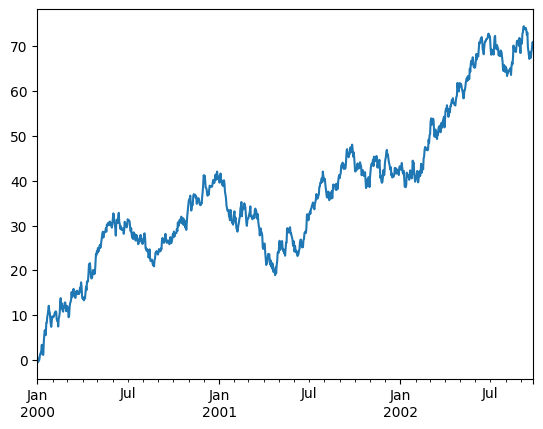

In [76]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

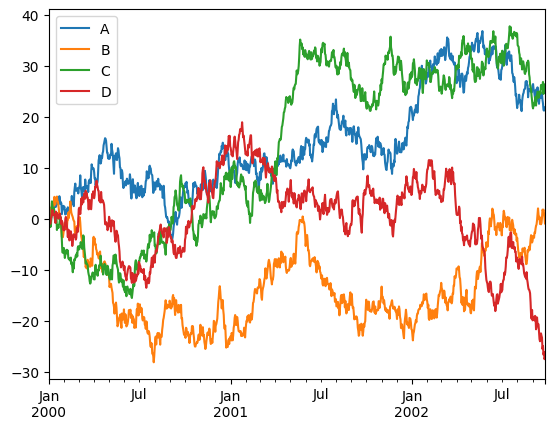

In [77]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])  
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

* figure : matplotlib에서 한 번에 한 장의 그림을 그리는데, 이 그림을 가리키는 용어
* plt.figure : figure의 속성을 조절
* legend(범례) : 그래프에 데이터의 종류를 표시하기 위한 텍스트
* plt.legend() : 그래프에 다양한 방식으로 범례를 표시하게 해줌
* plt.legend(log='best') : 그래프의 최적의 위치에 표시 / 다른 그래프 속성은 인터넷 참고

12. Getting Data In / Out (데이터 입출력)

CSV : 몇 가지 필드를 쉼표로 구분한 텍스트 데이터 및 텍스트 파일

In [78]:
df.to_csv('foo.csv') #csv파일에 씀

In [79]:
pd.read_csv('foo.csv') #csv파일을 읽음

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.301211,-1.889668,-0.824302,-0.883168
1,2000-01-02,2.276723,-1.396954,-0.792633,-1.041200
2,2000-01-03,0.783545,-0.801817,-0.575752,-0.879450
3,2000-01-04,0.133941,1.705900,-1.646483,-0.940738
4,2000-01-05,-0.502251,2.026952,-1.151287,0.121010
...,...,...,...,...,...
995,2002-09-22,22.583001,1.566691,26.789971,-25.000761
996,2002-09-23,21.298766,1.764638,24.437134,-26.676858
997,2002-09-24,21.171520,1.086335,26.094488,-26.168991
998,2002-09-25,21.444912,0.333276,26.320623,-27.547435


HDF5 : 계층적 데이터 형식, HDF Grout에 의해 관리되고 있는 대용량 데이터를 저장하기 위한 파일 형식

.to_hdf() : HDF5 Store에 씀
.read_hdf() : HDF5 Store을 읽음

Excel

MS Excel에 읽고 씀

.to_excel() : 엑셀 파일에 씀
.read_excel() : 엑셀 파일을 읽어옴

13. Gotchas (잡았다!)

예외 상황 처리

In [80]:
if pd.Series([False, True, False]):
    print("I was true")


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

위의 예외 상황인 경우는 any(), all(), empty 등을 사용해서 무엇을 원하는지 선택(반영) 해주어야 됨.

In [ ]:
if pd.Series([False, True, False])is not None:
      print("I was not None")

I was not None
